# Steps for making report final project


1.   Reading and Understanding Data
2.   Exploratory Data Analysis
        - Data Cleaning
        - Univariate Analysis
        - Bivariate Analysis
        - Multivariate Analysis
3.   Outliers Treatment
4.   Scaling Data
5.   Creating k means clustering and visualizing clusters formed
6.   Report countries








## Step 1: Reading and Understanding Data

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import numpy as np

df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.shape

(167, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## EDA

#### Univariate analysis

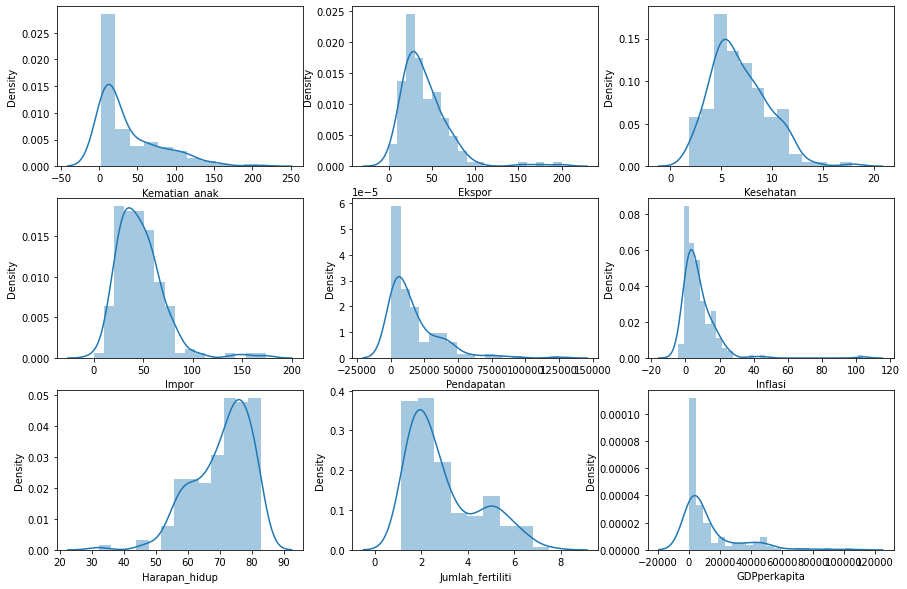

In [ ]:
plt.figure(figsize=(15,10))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

#### Bivariate



In [ ]:
Pendapatan = df.sort_values('Pendapatan', ascending=False)
Pendapatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
123,Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,175.00,7.77,142.0,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,67.40,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.70,2.63,30.4,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,200.00,3.96,174.0,72100,-0.046,82.7,1.15,46600
...,...,...,...,...,...,...,...,...,...,...
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327


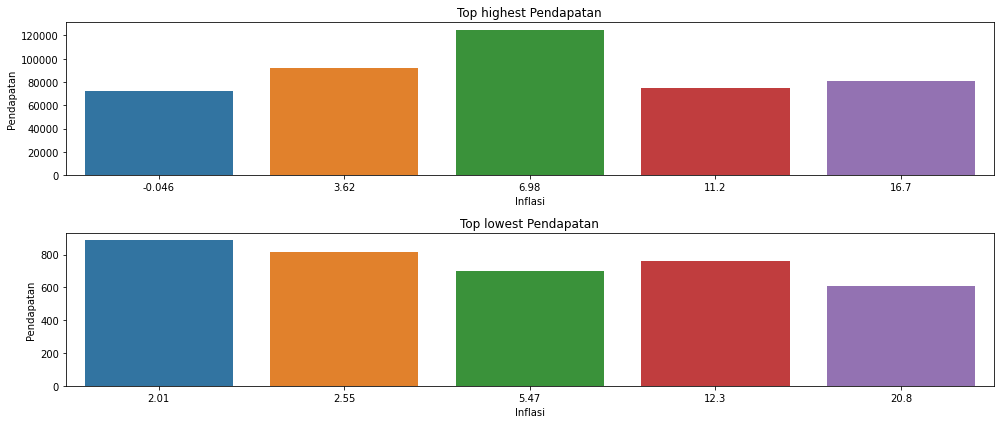

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(Pendapatan.Inflasi.head(), Pendapatan.Pendapatan.head())
plt.title('Top highest Pendapatan')
plt.subplot(2,1,2)
sns.barplot(Pendapatan.Inflasi.tail(), Pendapatan.Pendapatan.tail())
plt.title('Top lowest Pendapatan')
plt.tight_layout()
plt.show()

#### Multivariate

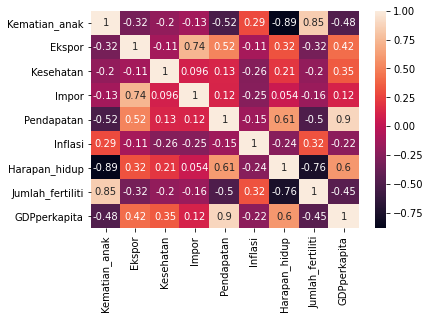

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2g');

##vOutlier Treatment

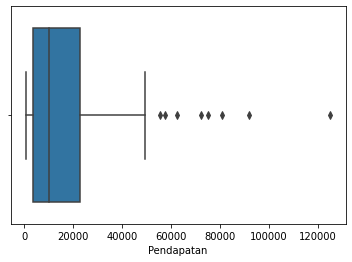

In [ ]:
sns.boxplot('Pendapatan', data=df)

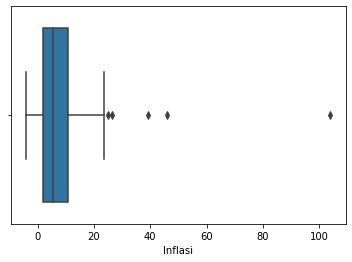

In [ ]:
sns.boxplot('Inflasi', data=df);

In [ ]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
print(finding_outlier(df['Inflasi']))
print(finding_outlier(df['Pendapatan']))

49      24.9
103     39.2
113    104.0
149     26.5
163     45.9
Name: Inflasi, dtype: float64
23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: Pendapatan, dtype: int64


In [ ]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
df2 = remove_outlier(df[['Inflasi', 'Pendapatan', 'Negara']])

df2.dropna(axis=0, inplace=True)
df2

,Inflasi,Pendapatan,Negara
0,9.44,1610,Afghanistan
1,4.49,9930,Albania
2,16.10,12900,Algeria
3,22.40,5900,Angola
4,1.44,19100,Antigua and Barbuda
...,...,...,...
162,2.62,2950,Vanuatu
163,45.90,16500,Venezuela
164,12.10,4490,Vietnam
165,23.60,4480,Yemen


In [ ]:
df2['Inflasi'].unique()

array([ 9.44e+00,  4.49e+00,  1.61e+01,  2.24e+01,  1.44e+00,  2.09e+01,
        7.77e+00,  1.16e+00,  8.73e-01,  1.38e+01, -3.93e-01,  7.44e+00,
        7.14e+00,  3.21e-01,  1.51e+01,  1.88e+00,  1.14e+00,  8.85e-01,
        5.99e+00,  8.78e+00,  1.40e+00,  8.92e+00,  8.41e+00,  1.67e+01,
        1.11e+00,  6.81e+00,  1.23e+01,  3.12e+00,  1.91e+00,  2.87e+00,
        5.05e-01,  2.01e+00,  6.39e+00,  8.96e+00,  6.94e+00,  3.86e+00,
        3.87e+00,  2.08e+01,  2.07e+01,  6.57e+00,  5.39e+00,  8.21e-01,
       -1.43e+00,  3.22e+00,  5.44e+00,  7.47e+00,  1.01e+01,  2.65e+00,
        2.49e+01,  1.16e+01,  1.74e+00,  4.23e+00,  3.51e-01,  1.05e+00,
        1.66e+01,  4.30e+00,  8.55e+00,  7.58e-01,  6.73e-01,  4.80e-01,
        5.14e+00,  2.97e+00,  5.73e+00,  5.45e+00,  2.33e+00,  5.47e+00,
        8.98e+00,  1.53e+01,  1.59e+01, -3.22e+00,  1.77e+00,  3.19e-01,
        9.81e+00, -1.90e+00,  8.43e+00,  1.95e+01,  2.09e+00,  1.52e+00,
        1.12e+01,  1.00e+01,  9.20e+00, -8.12e-01, 

## Scaling Data

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_std = sc.fit_transform(df2.astype(float))

In [ ]:
#clustering with KMeans

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 3, random_state=42).fit(new_df)
labels1 = kmeans1.labels_
labels1

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
new_df = pd.DataFrame(data=new_df, columns=['Inflasi', 'Pendapatan'])
new_df['label1_kmeans'] = labels1
new_df.sort_values(by='label1_kmeans', ascending = True)

,Inflasi,Pendapatan,label1_kmeans
0,0.157336,-0.808245,0
112,-0.496426,-0.849660,0
109,0.694389,-0.788475,0
108,-0.400591,-0.451851,0
107,-0.070389,-0.698465,0
...,...,...,...
115,0.741831,1.464877,1
60,-0.674526,0.601205,1
114,-0.173815,2.349360,1
42,-0.547664,0.871752,1


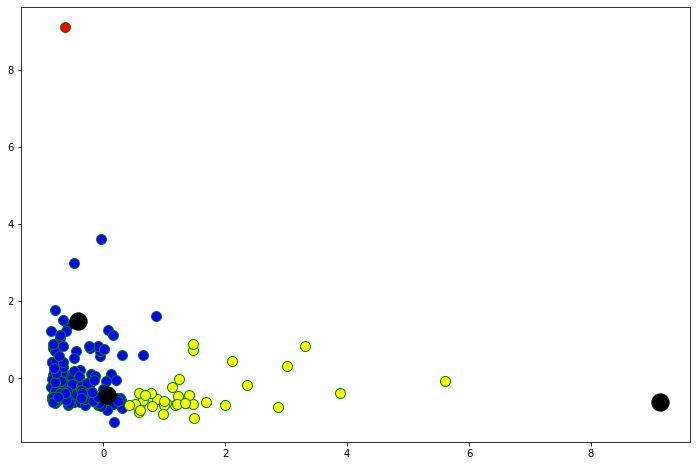

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==0], new_df['Inflasi'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==1], new_df['Inflasi'][new_df.label1_kmeans==1], c='yellow', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==2], new_df['Inflasi'][new_df.label1_kmeans==2], c='red', s=100, edgecolors='green')
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], c='k', s=300)

plt.show()

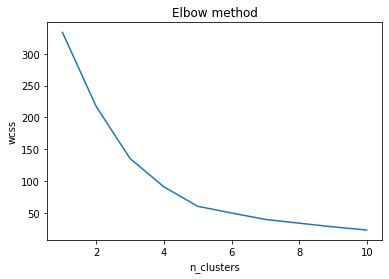

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_


In [ ]:
new_df['label2_kmeans'] = labels2
new_df

,Inflasi,Pendapatan,label1_kmeans,label2_kmeans
0,0.157336,-0.808245,0,0
1,-0.312347,-0.375369,0,0
2,0.789274,-0.220844,0,2
3,1.387054,-0.585043,0,2
4,-0.601749,0.101732,0,0
...,...,...,...,...
162,-0.489784,-0.738527,0,0
163,3.616865,-0.033542,0,2
164,0.409732,-0.658404,0,0
165,1.500916,-0.658924,0,2


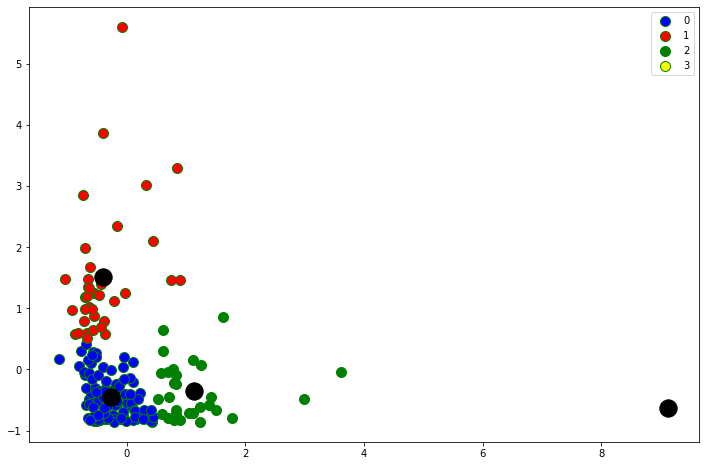

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Inflasi'][new_df.label2_kmeans==0], new_df['Pendapatan'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Inflasi'][new_df.label2_kmeans==1], new_df['Pendapatan'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Inflasi'][new_df.label2_kmeans==2], new_df['Pendapatan'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['Inflasi'][new_df.label2_kmeans==3], new_df['Pendapatan'][new_df.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

In [ ]:
#summary
df['K_means_labels'] = kmeans2.labels_

In [ ]:
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


In [ ]:
#filtering

In [ ]:
top_Pendapatan = df[df['K_means_labels']==1]

In [ ]:
top_Pendapatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1


In [154]:
Pendapatan.sort_values(by=['GDPperkapita'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482


In [ ]:
df_2 = remove_outlier(df[['Kematian_anak','Ekspor','Kesehatan','Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita', 'Impor']])
#df_2.dropna(axis=0, inplace=True)
df_2


,Kematian_anak,Ekspor,Kesehatan,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Impor
0,90.2,10.0,7.58,56.2,5.82,553,44.9
1,16.6,28.0,6.55,76.3,1.65,4090,48.6
2,27.3,38.4,4.17,76.5,2.89,4460,31.4
3,119.0,62.3,2.85,60.1,6.16,3530,42.9
4,10.3,45.5,6.03,76.8,2.13,12200,58.9
...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,63.0,3.50,2970,52.7
163,17.1,28.5,4.91,75.4,2.47,13500,17.6
164,23.3,72.0,6.84,73.1,1.95,1310,80.2
165,56.3,30.0,5.18,67.5,4.67,1310,34.4


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3 = sc.fit_transform(df2.astype(float))

In [ ]:
kmeans3 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df3)
labels3 = kmeans3.labels_

In [ ]:
df_4 = pd.DataFrame(data=new_df, columns=['Pendapatan', 'Inflasi'])
df_4['label3_kmeans'] = labels3

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df['Kematian_anak'][new_df.label3_kmeans==0], new_df['Pendapatan'][new_df.label3_kmeans==0], new_df['GDPperkapita'][new_df.label3_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df['Kematian_anak'][new_df.label3_kmeans==1], new_df['Pendapatan'][new_df.label3_kmeans==1], new_df['GDPperkapita'][new_df.label3_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df['Kematian_anak'][new_df.label3_kmeans==2], new_df['Pendapatan'][new_df.label3_kmeans==2], new_df['GDPperkapita'][new_df.label3_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df['Kematian_anak'][new_df.label3_kmeans==3], new_df['Pendapatan'][new_df.label3_kmeans==3], new_df['GDPperkapita'][new_df.label3_kmeans==3], c='yellow', s=100, edgecolors='green')

#plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Customer cluster')
plt.xlabel('Kematian')
plt.ylabel('Pendapatan')
ax.set_zlabel('GDPperkapita')
plt.show()